In [1]:
import pickle

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, roc_curve

In [4]:
import math

In [5]:
print(os.listdir("D:\College Stuff\TY\ML\MP\Dataset\Peach"))

['Bacterial_spot', 'Healthy']


In [6]:
SIZE = 256

In [7]:
peach_images = []
peach_labels = [] 
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        peach_images.append(img)
        peach_labels.append(label)
for directory_path in glob.glob("D:\College Stuff\TY\ML\MP\Dataset\Peach\Bacterial_spot"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        peach_images.append(img)
        peach_labels.append(label)

Healthy
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\017d3d86-12bf-4280-8929-10dcd504ac46___Rutg._HL 3671.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\02070622-2fd7-40d5-9470-27e513ea8a90___Rutg._HL 3636.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\026aa11e-3f67-4951-9533-3c6ceb4c3d59___Rutg._HL 2494.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\027b10e5-2d2e-4eb4-9457-7cb45ab2fd17___Rutg._HL 3710.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\02e47796-808b-449e-bbba-f6e0262fa589___Rutg._HL 3714.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\0305b105-d0e7-4c3d-9a10-e9f0d7d3c4e0___Rutg._HL 3564.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\0330bd7f-3401-4dd5-9462-5300a6e19b7c___Rutg._HL 3621.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\03913ec4-36a4-4591-a3f5-33b1cc1a53a0___Rutg._HL 3663.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy\04c14871-257f-4067-80f7-ecc5e50f42a4___Rutg._HL 3631.JPG
D:\College Stuff\TY\ML\MP\Dataset\Peach\Healthy

In [8]:
peach_images = np.array(peach_images)
peach_labels = np.array(peach_labels)

In [9]:
len(peach_images), len(peach_labels)

(2657, 2657)

In [10]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(peach_images, peach_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [11]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [12]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
#data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [14]:
x_train_aug = []
for i in x_train:
    img = data_augmentation(i)
    x_train_aug.append(img)

In [15]:
x_train_aug = np.array(x_train_aug)

In [16]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [17]:
x_train_aug.shape

(2125, 256, 256, 3)

In [18]:
x_train_new = x_train_aug.reshape(2125, 256*256*3)

In [19]:
x_train_aug.shape, x_train_new.shape

((2125, 256, 256, 3), (2125, 196608))

In [20]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded)

RandomForestClassifier(random_state=42)

In [21]:
x_test.shape

(532, 256, 256, 3)

In [22]:
x_test_new = x_test.reshape(532, 256*256*3)

In [23]:
x_test_new.shape

(532, 196608)

In [24]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [25]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.9473684210526315


In [26]:
y_test.shape, prediction_RF.shape

((532,), (532,))

<AxesSubplot:>

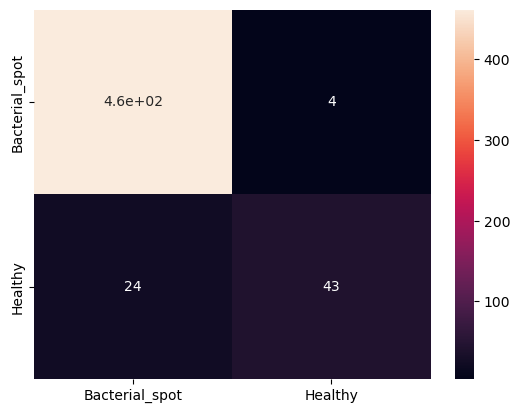

In [27]:
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ['Bacterial_spot', 'Healthy']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [28]:
cm

array([[461,   4],
       [ 24,  43]], dtype=int64)

The prediction for this image is:  ['Bacterial_spot']
The actual label for this image is:  Healthy
Label: 0


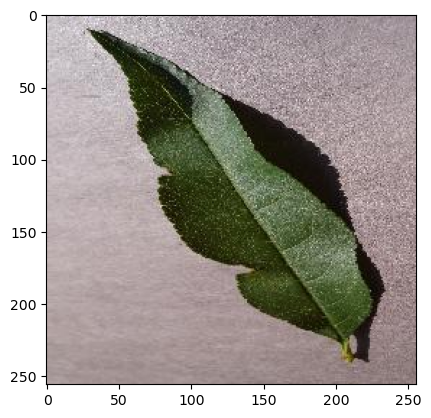

In [29]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=77 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF2 = RF_model.predict(x_test_new)[0] 
label = prediction_RF2
prediction_RF2 = le.inverse_transform([prediction_RF2])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF2)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [30]:
le.fit(y_test)
y_test_trans = le.transform(y_test)
le.fit(prediction_RF)
predRF_trans = le.transform(prediction_RF)

In [31]:
y_test_trans, predRF_trans

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [32]:
precision_logreg = precision_score(y_test_trans, predRF_trans, average = "macro")
accuracy_logreg = accuracy_score(y_test_trans, predRF_trans)
recall_logreg = recall_score(y_test_trans, predRF_trans, average = "macro")
f1_logreg = f1_score(y_test_trans, predRF_trans, average = "macro")
mse_logreg = mean_squared_error(y_test_trans, predRF_trans)
rmse_logreg = math.sqrt(mse_logreg)

In [33]:
print(
    "Precision score: ", precision_logreg,"\n",
    "Accuracy score: ", accuracy_logreg,"\n",
    "Recall score: ", recall_logreg,"\n",
    "F-1 score: ", f1_logreg,"\n",
    "Mean Squared Error: ", mse_logreg,"\n",
    "Root mean squared error: ", rmse_logreg
)

Precision score:  0.9327045404694012 
 Accuracy score:  0.9473684210526315 
 Recall score:  0.8165944471192426 
 F-1 score:  0.8624561403508771 
 Mean Squared Error:  0.05263157894736842 
 Root mean squared error:  0.22941573387056177


In [34]:
from sklearn.metrics import roc_curve
def make_roc_curve(fpr1,tpr1,p_fpr,p_tpr, title):

    plt.plot(fpr1, tpr1, linestyle='--',color='orange')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title(title)
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


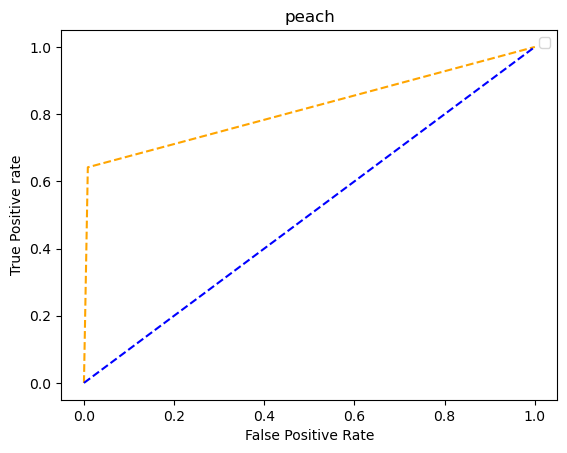

In [35]:
fpr1, tpr1, thresh1 = roc_curve(y_test_trans, predRF_trans, pos_label=1)
random_probs = [0 for i in range(len(y_test_trans))]
p_fpr, p_tpr, _ = roc_curve(y_test_trans, random_probs, pos_label=1)

make_roc_curve(fpr1,tpr1,p_fpr,p_tpr, title = "peach")

In [36]:
filename = "D:\College Stuff\TY\ML\MP\Main\Models\peach_rf.pickle"

# save model
pickle.dump(RF_model, open(filename, "wb"))

# load model
# loaded_model = pickle.load(open(filename, "rb"))